# Otimização - Introdução (Cap. 1)

### Imports

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max.columns',500)
%matplotlib inline
from IPython.display import Image

## 1. Definições

Formalmente, **otimização** significa:

*"the action or process ofmaking the best of something; (also) the action or process of rendering
optimal; the state or condition of being optimal."*

Diante dessa definição, é possível identificar os principais elementos constituintes de um **problema de otimização**:
* <u>Parâmetros de entrada:</u> parâmetros do problema que o caracterizam completamente;
* <u>Variáveis de entrada:</u> conjunto de parâmetros que serão levados em consideração, compreendendo que a complexidade do problema cresce exponencialmente com o aumento do número de variáveis;
* <u>Amostra de entrada:</u> vetor n-dimensional (em que n é o número de variáveis de entrada) contendo uma combinação possível de variáveis de entrada;
* <u>Espaço de estados:</u> espaço Euclidiano n-dimensional contendo todas as amostras possíveis;
* <u>Parâmetros de saída:</u> solução otimizada do problema. Se o problema for estático, a solução pode ser um vetor. Se o problema for variável, a solução será um conjunto de funções que recebem a variáveis de entrada e geram uma vetor de solução para a respectiva amostra;
* <u>Restrições:</u> limites para as variáveis (de entrada ou de saída) do problema. As restrições servem pra que não se otimize problemas não factíveis ou para que não se encontre soluções não causais;
* <u>Função objetivo:</u> maneira de medir o desempenho de uma solução presente no espaço de soluções do problema.
  
A figura abaixo traz um fluxograma básico de um fluxo de otimização:

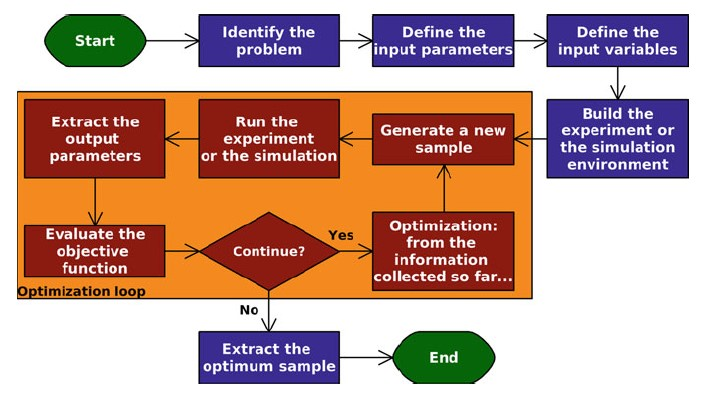

In [2]:
Image('../assets/fluxo_otimizacao.jpg')

## 2. Segmentação de problemas de otimização

Os problemas de otimização podem ser divididos em 3 principais áreas/etapas:

1. Design do experimento;
2. Algoritmos de otimização;
3. Análise de robustez.

A figura abaixo traz um esquemático dessas áreas.

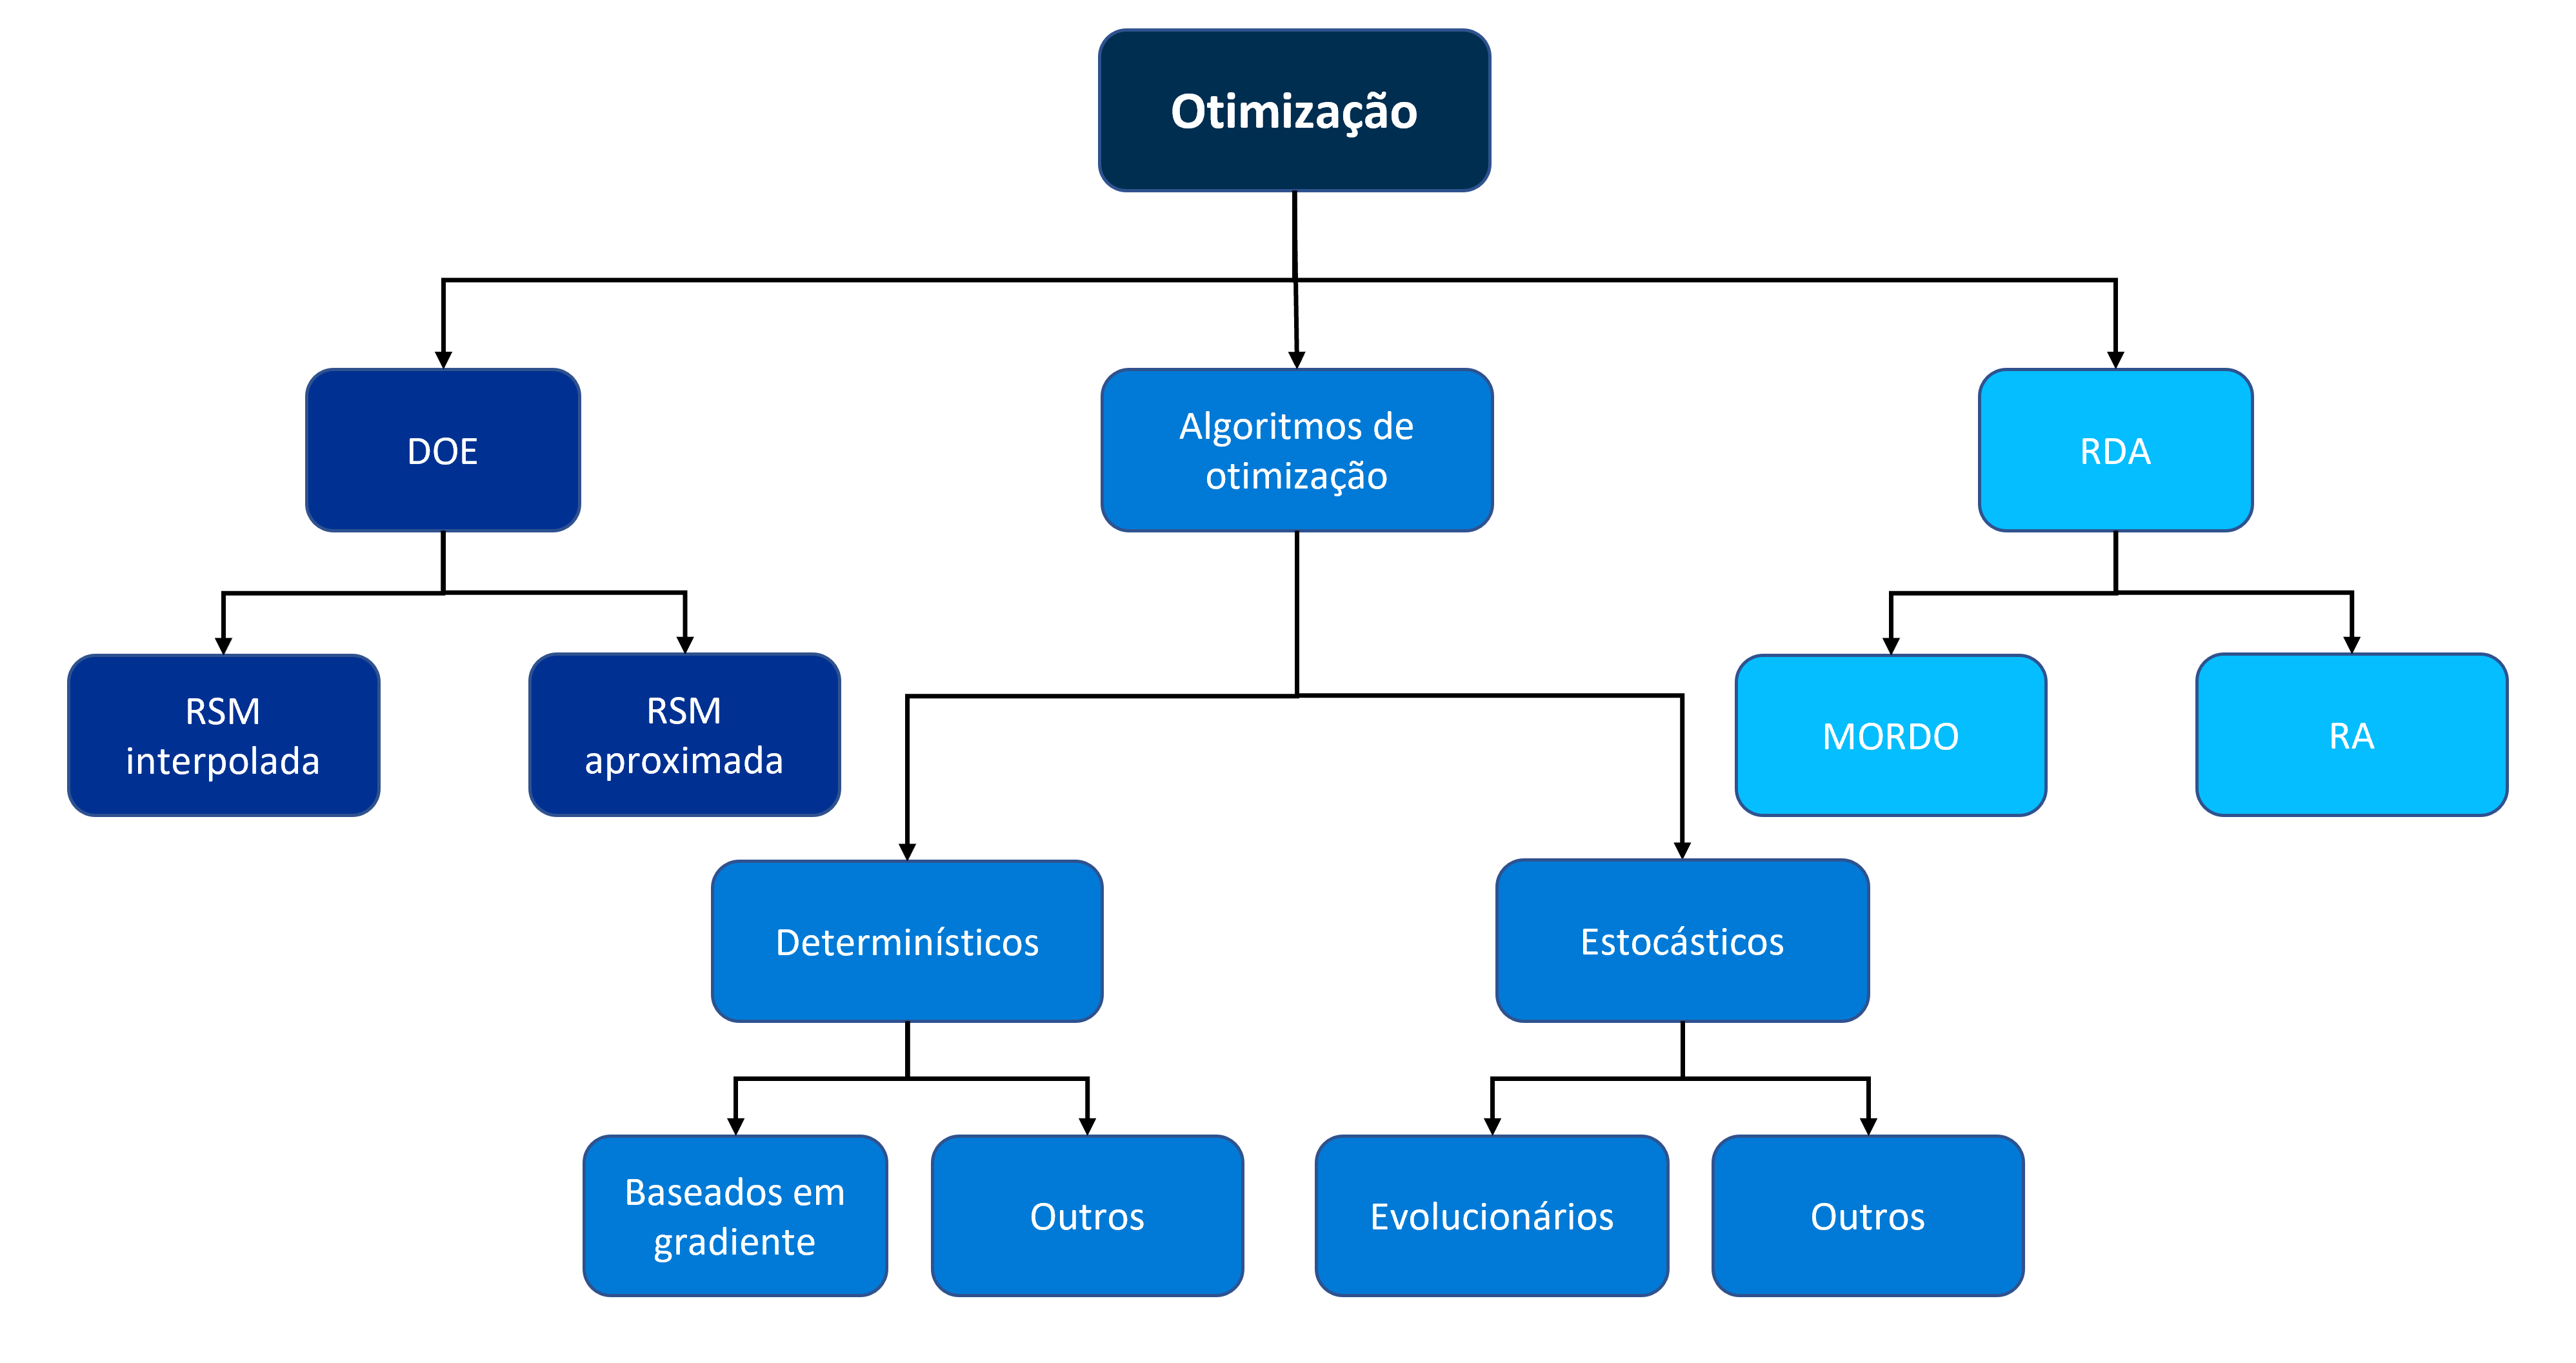

In [3]:
Image('../assets/segmentacao_completa.PNG', width = 500, height = 250)

### 2.1 Design do experimento (DOE - *Design of Experiment*)

O DOE não é uma técnica de otimização em si, é uma etapa que busca uma forma de escolher amostras do espaço de estados contendo o máximo de informações possíveis, minimizando os número de recursos pra isso.

O DOE é geralmente seguido por uma subetapa denominada **Modelagem da Superfície de Resposta (RSM - *Response Surface Modelling*)**, em que se busca aproximar as informações extraídas do DOE. No RSM, busca-se interpolar/aproximar o problema a partir das possíveis combinações de entrada, buscando uma superfície de resposta, dada uma determinada combinação de variáveis de entrada.

A figura abaixo ilustra a ramificação a partir do DOE, passando pra dois tipos deed RSM, um por interpolação e outro por aproximação dos resultados.

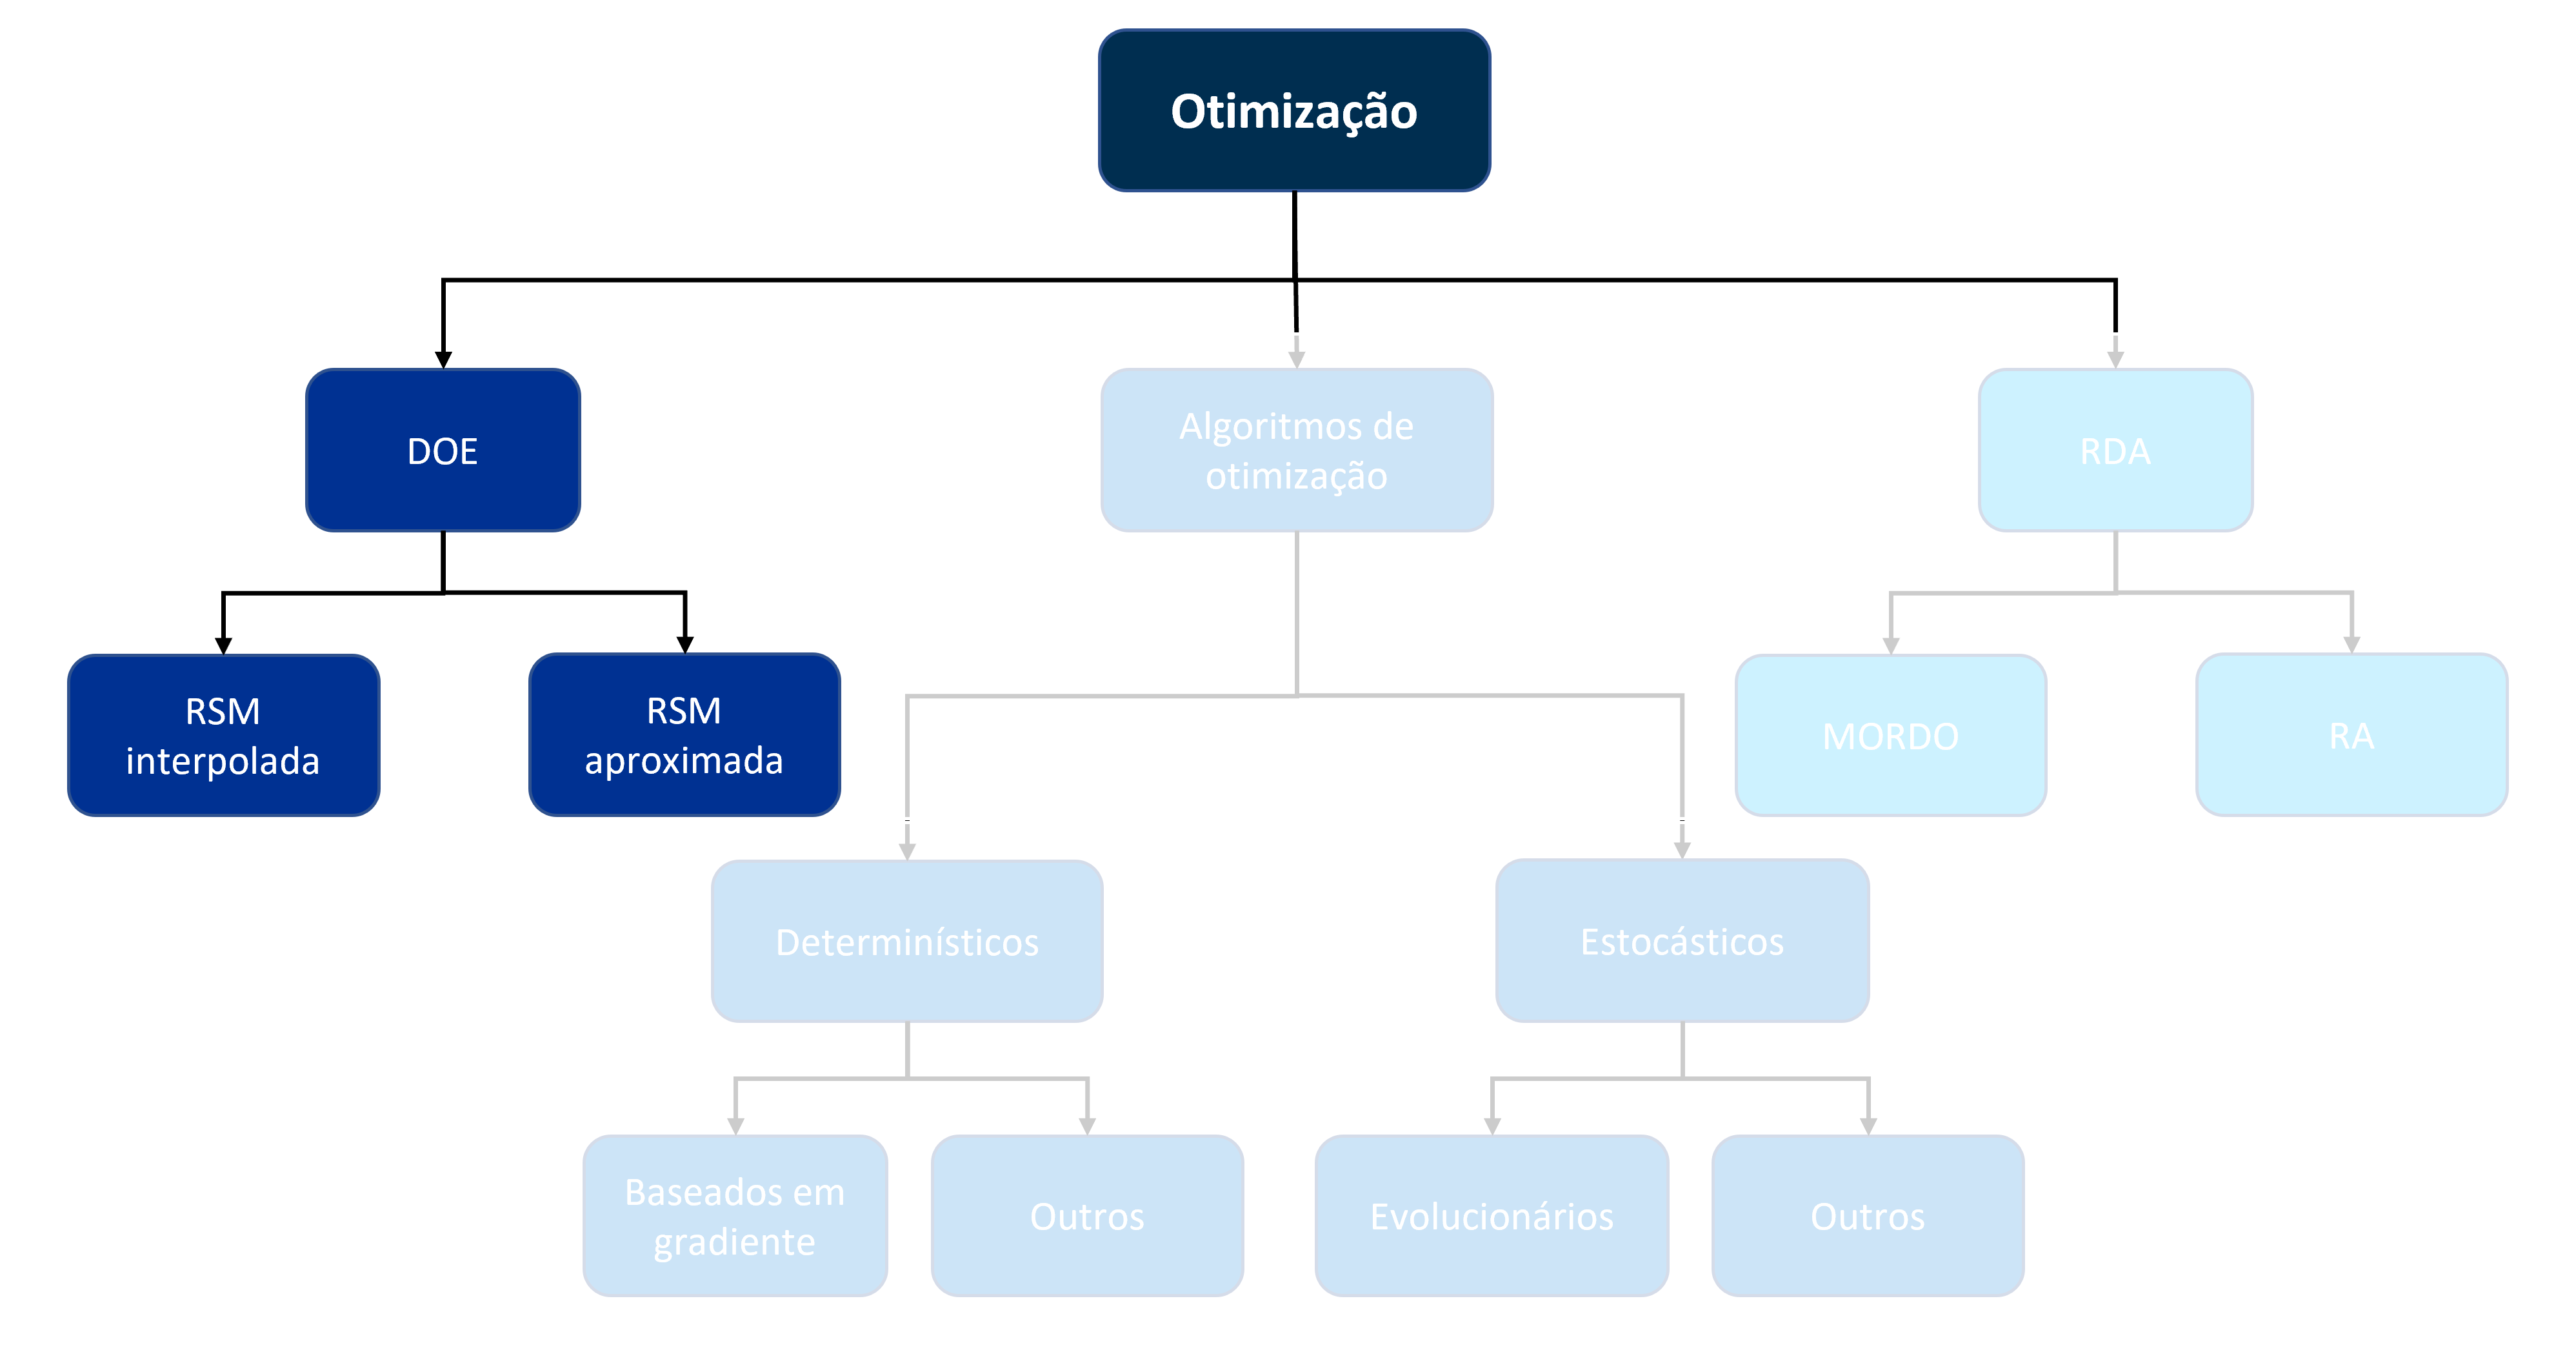

In [4]:
Image('../assets/DOE_apagado.PNG', width = 800, height = 450)

Aplicar o DOE+RSM é vantajoso do ponto de vista de custo, já que tendem a ser muito mais baratos que quakquer algoritmos de otimização. Como ponto negativo, o DOE+RSM encontrar soluções simplificadas, que muitas vezes não encontra pontos menos gerais. **Assim, o ideal seria realizar as duas etapas, usando o DOE+RSM pra compreender ajustar o problema e algoritmos de otimização pra encontrar soluções mais robustas**.

### 2.2 Algoritmos de otimização

Algoritmos de otimização podem ser classificados de acordo com vários princípios, dos quais, destacam-se:

* **Quanto ao processo de busca de soluções:**
    * <u>Otimização determinística:</u> também conhecida como **programação matemática**, é a otimização em que uma rotina puramente matemática soluciona o problema, sem a necessidade de se tratar com processos aleatórios;
        * ex: Otimização baseada em gradientes (algoritmos que encontram soluções a partir da estimação do gradiente das funções objetivo).
    * <u>Otimização estocástica:</u> algoritmos que usam de elementos estocásticos (aleatórios) para encontrar soluções para o problema;
        * ex: Otimização evolucionária (algoritmos que buscam soluções por meio de um processo similar à seleção natural de Darwin, em que as soluções mais "fortes" sobrevivem e as mais "fracas" desaparecem).

* **Quanto ao número de objetivos:**
    * <u>Otimização mono-objetivo:</u> algoritmos de otimização que encontram soluções que satisfaçam **apenas um** objetivo;
    * <u>Otimização multiobjetivo:</u> algoritmos de otimização que encontram soluções que satisfaçam **mais de um objetivo**. Nesse caso, é possível que os objetivos sejam conflitantes, necessitando de uma análise mais profunda entre o *trade-off* de priorizar um em detrimento dos outros.

* **Quanto à natureza da otimização:**
    * <u>Otimização local:</u> algoritmos que encontram soluções locais, ou seja, que possuem uma estrutura que **não** os permite escapar de mínimos locais. Algoritmos **determinísticos** geralmente são dessa natureza; 
    * <u>Otimização global:</u> algoritmos que encontram soluções globais, ou seja, que possuem uma estrutura que os permite escapar de mínimos locais. Algoritmos **estocásticos** geralmente são dessa natureza.

* **Quanto a outras características:**
    * <u>Otimização convexa:</u> subconjunto dos algoritmos baseados em gradiente que possui **função objetivo convexa**, o que permite uma rápida convergência;
    * <u>Otimização discreta:</u> algoritmos que são capazes de lidar com variáveis não-contínuas e, em alguns momentos, categóricas.

A figura abaixo ilustra uma subdivisão levando em consideração a principal classificação, que diz respeito ao processo de busca de soluções.



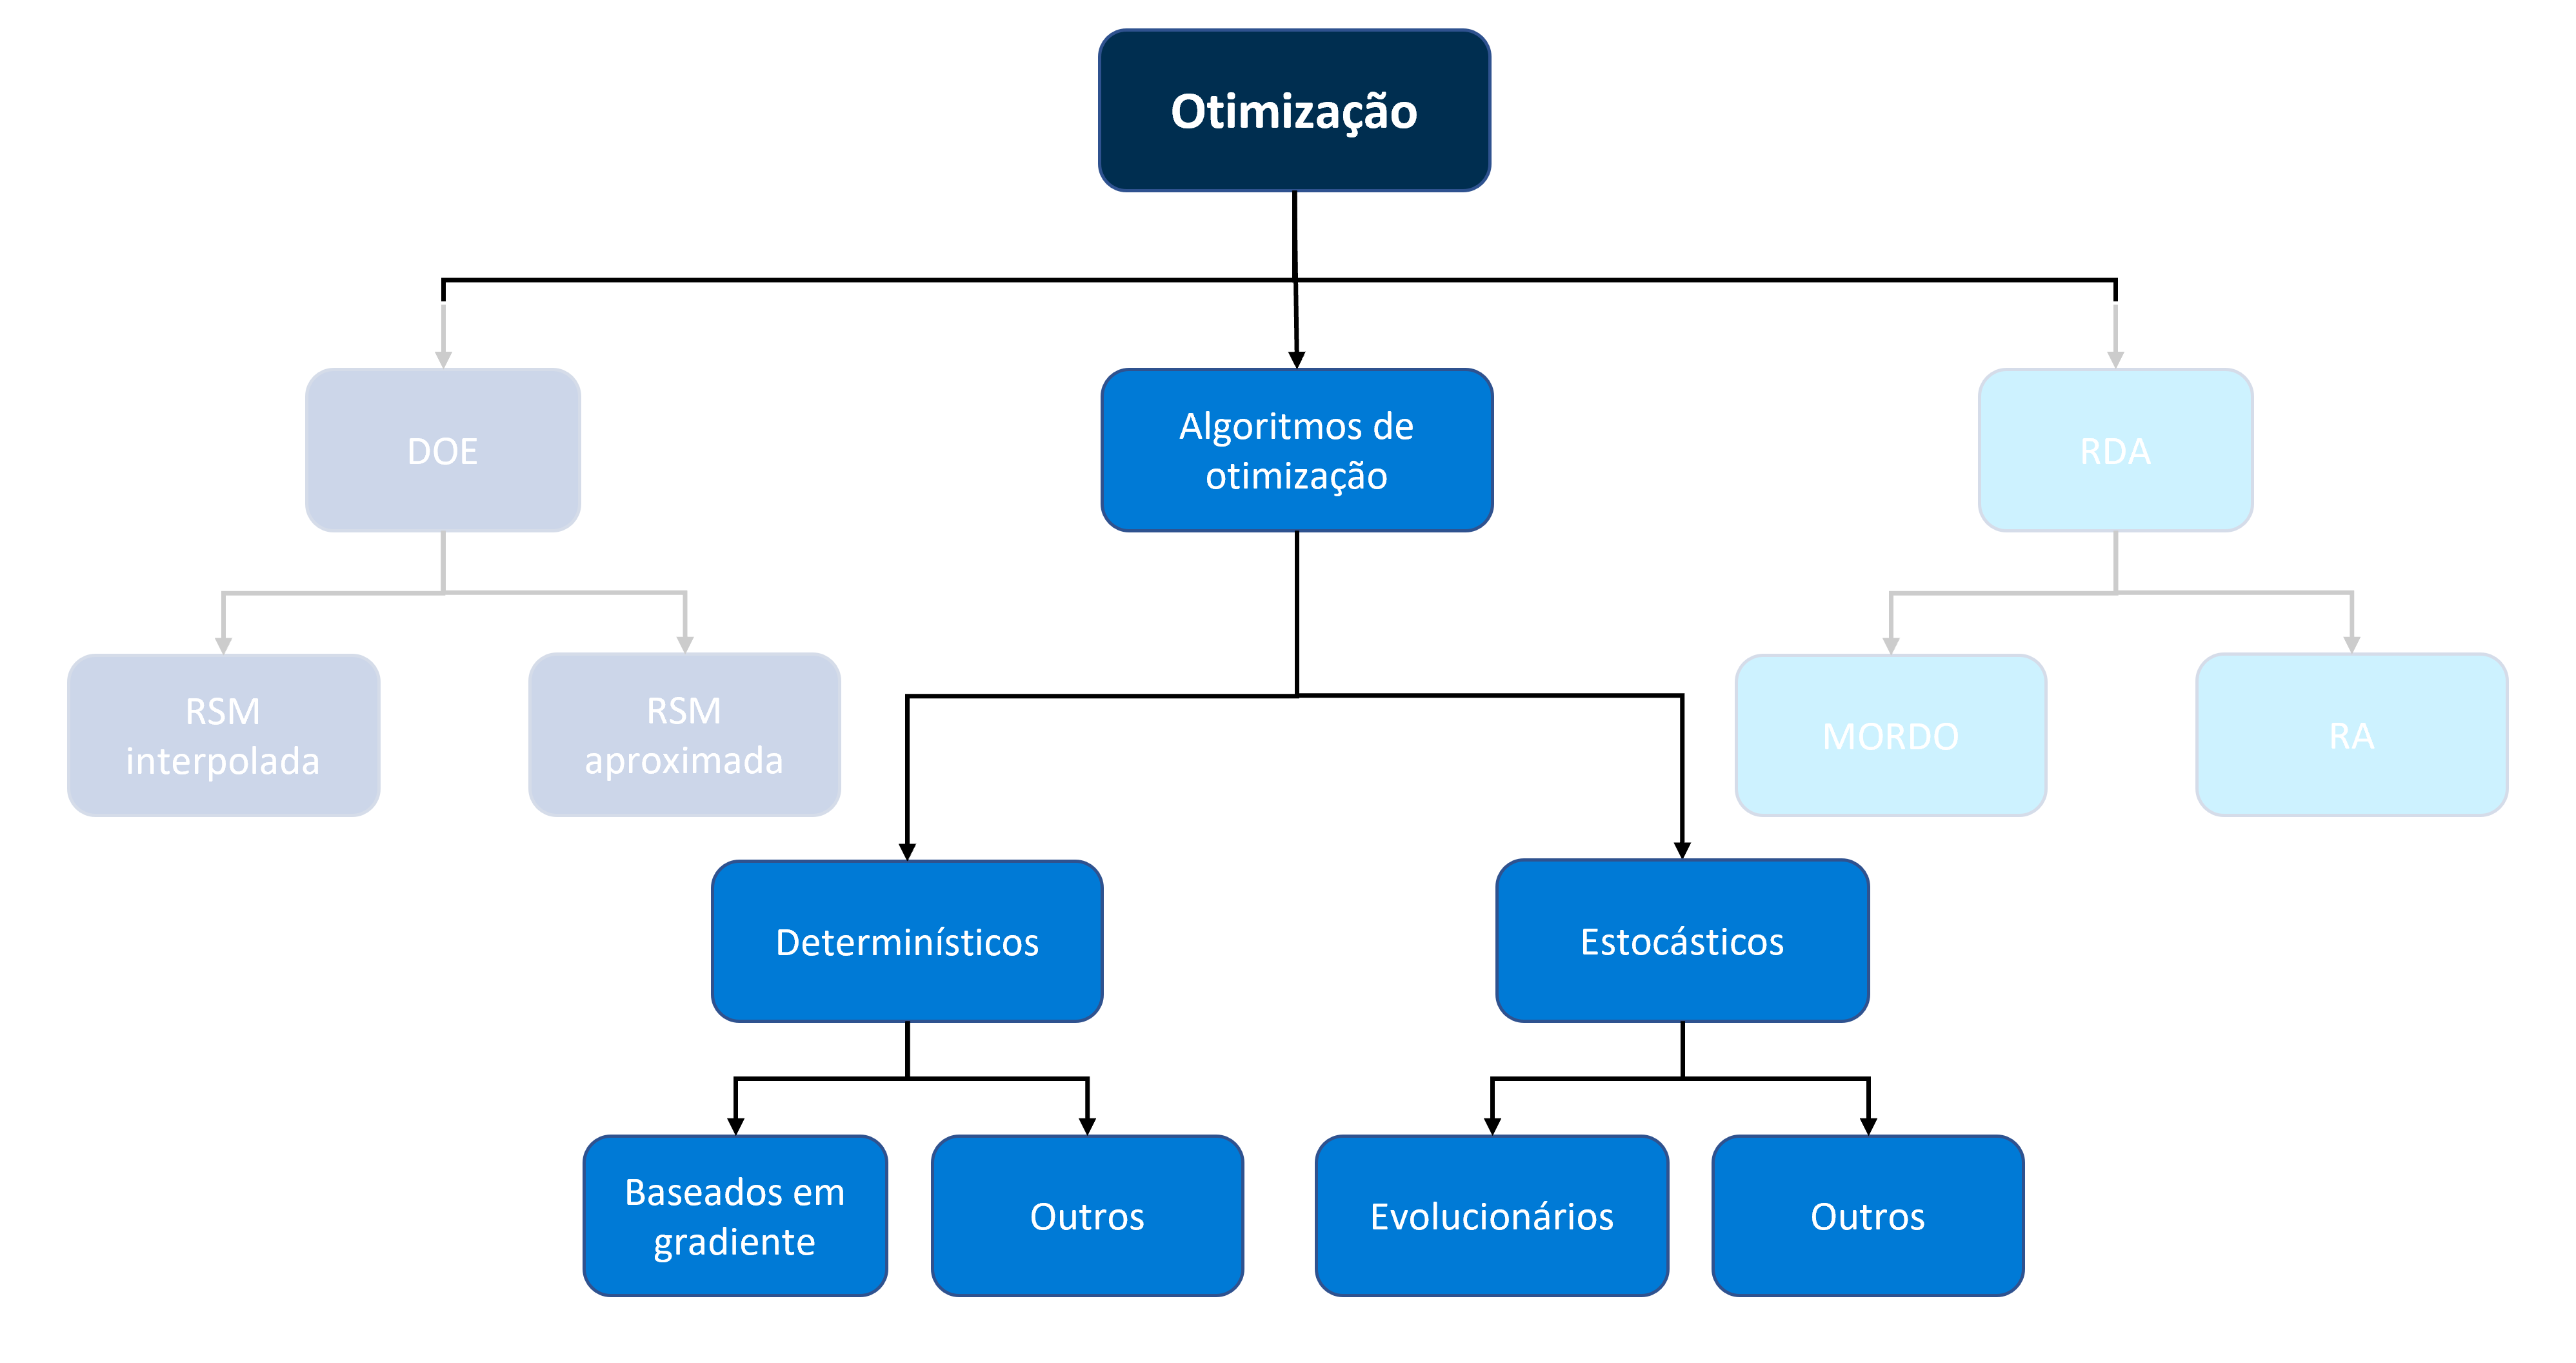

In [5]:
Image('../assets/algoritmos_otimizacao_apagado.PNG', width = 800, height = 450)

### 2.3 Análise de Robustez (RDA - *Robust Design Analysis*)

Também conhecida como *Robust Engineering Design*, essa área se dedica a avaliar a robustez das soluções encontradas. O termo **Robustez** se refere a habilidade de uma solução se adaptar à presença de ruído nos parâmetros de entrada sem produzir grandes variações nos parâmetros de saída e/ou na função objetivo. Essas variações tornam a solução instável ou geram degradação de desempenho do mesmo.

Existem duas principais aborgadens de RDA:
* <u>*Multi-Objective Robust Design Optimization* (MORDO):</u> consiste na amostragem da distribuição de probabilidade ao redor de uma amostra de solução, repetindo isso pra diferentes amostras do dataset e coletando as características estatísticas da variabilidade.
* <u>*Reliability Analysis* (RA):</u> consiste em calcular a probabilidade (e a distribuição) de um determinado nível de ruído causar uma queda de performance que viole um determinado limiar, o que seria diminuiria o nível confiabilidade do algoritmo nessas situações. Em outras palavras, é a estimação da **probabilidade de falha**.

A figura abaixo o processo de análise de robustez e suas duas subdivisões.

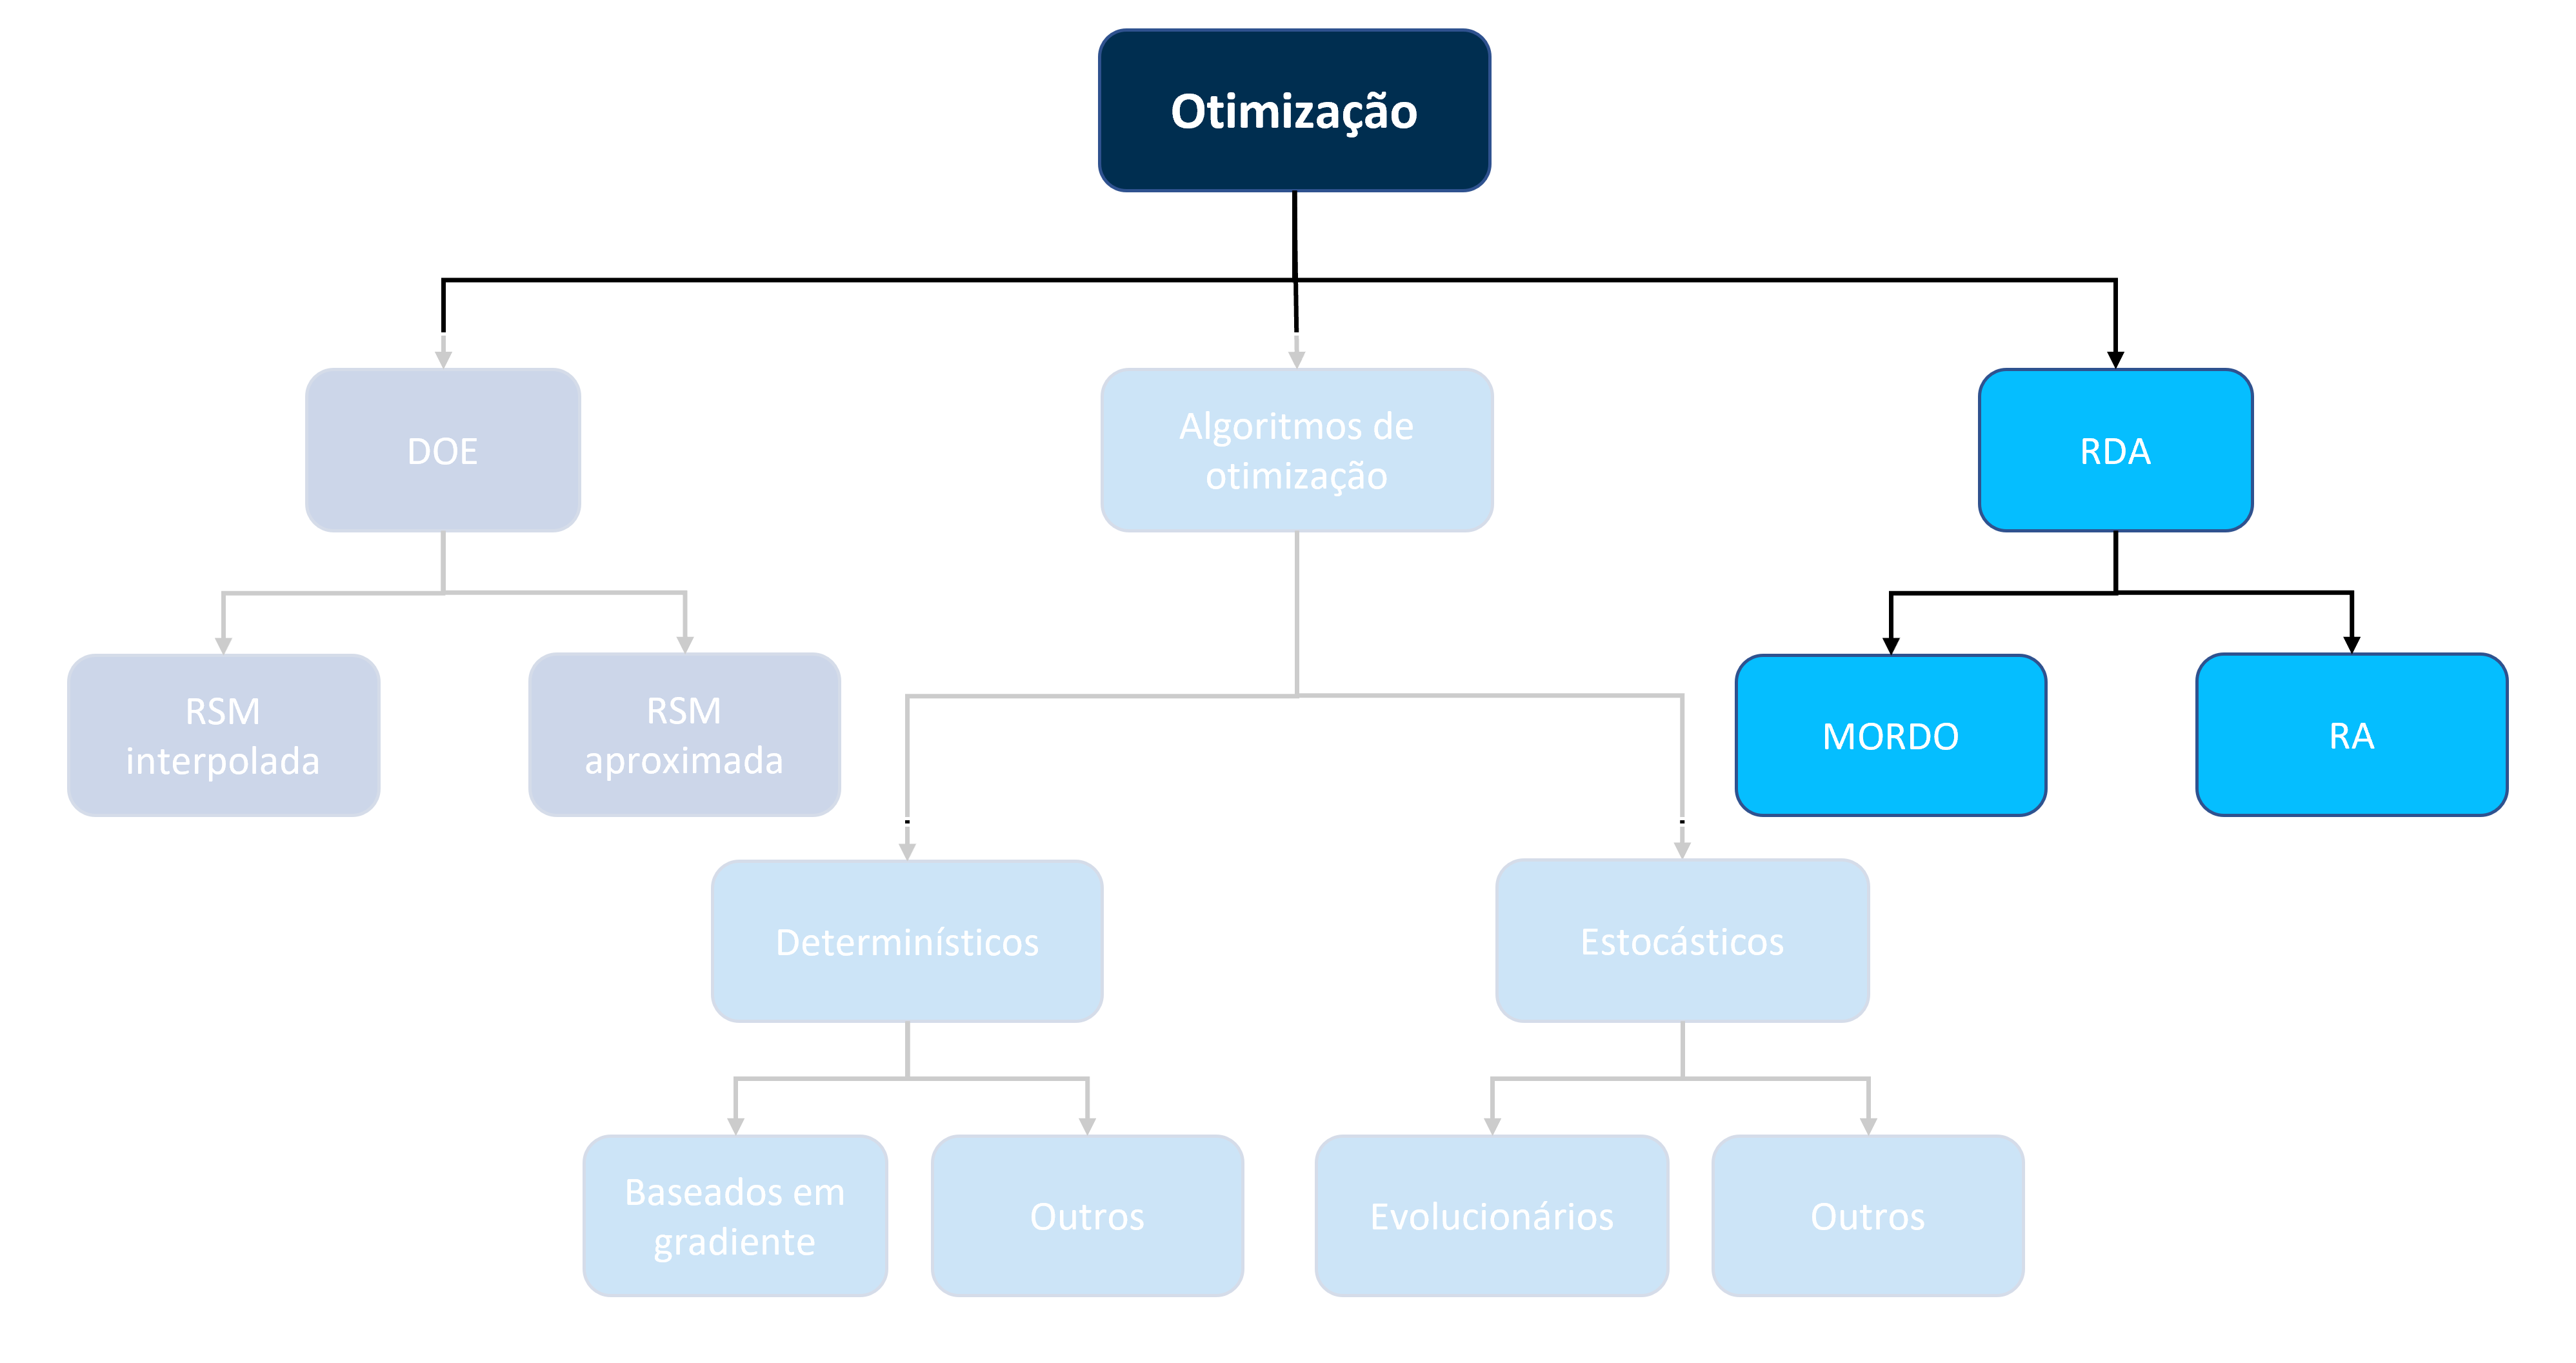

In [6]:
Image('../assets/analise_robustez_apagado.PNG', width = 800, height = 450)

## 3. Aplicação

O problema que vamos abordar é de alocação de pedidos:

Suporemos que uma empresa que vende carros possui 3 fábricas, cada uma com características diferentes. Essas características determinam quantos dias uma fábrica precisa para produzir um carro e qual é o custo por carro. Sabe-se que a velocidade de produção dos carros e o custo são valores **inversamente proporcionais**. A tabela abaixo condensa essas duas variáveis de cada fábrica:

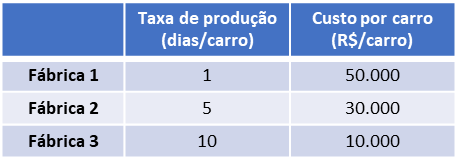

Assim, implementaremos em Python os vetores para o custo e o tempo de produção por carro.

In [7]:
n_fabricas = 3
custo_por_carro = np.array([50, 30, 10]) #em milhares de reais
tempo_por_carro = np.array([1, 5, 10]) #em dias

Assim, o objetivo do algoritmo é encontrar uma solução que, dada uma quantidade de carros demandada, consiga definir quantos carros cada uma dessas fábricas deve produzir, visando minimizar o custo e o tempo de entrega. Entretanto, como vimos, ambas as variáveis são valores **inversamente proporcionais** de forma que não é possível satisfazer ambos os objetivos simultaneamente.

Diante desse problema biobjetivo com objetivos conflitantes, é preciso encontrar uma solução que permita gerar lucro para a empresa, mas que também entregue os carros em tempo hábil. Nesse cenário, é necessário utilizar uma abordagem **multiobjetiva** do problema.

### 3.1 Problemas Multiobjetivos

Uma forma de solucionar problemas multiobjetivos, é ponderar cada um dos subobjetivos, buscando entender a relação conflitante entre eles e como as soluções atendem a cada um. Assim, de maneira geral, a função objetivo $r$ de um problema com $K$ subobjetivos é definida como:

$$ r = \sum^K_{k=1} \omega_kr_k' $$

em que $\omega_k$ é o peso que pondera o $k$-ésimo subobjetivo e $r_k'$ é o valor da função do $k$-ésimo subobjetivo. Os pesos devem seguir a restrição de que:

$$ \sum_{k=1}^K \omega_k = 1 $$

### 3.2 Funções Subobjetivas

Como já mencionado, o problema é bi-objetivo com conflito, de forma que cada um desses objetivos podem ser definidos por funções subobjetivas $f_1$ e $f_2$:

$$ 
f_1(c) = \lambda_1c
$$

$$ 
f_2(t) = \lambda_2t
$$


em que $c$ é o custo, $t$ é o tempo e $\lambda_1$ e $\lambda_2$ são parâmetros de ajuste das funções.

Assim, para o nosso problema, é possível definir a função objetivo $r(c,t)$ como:

$$ r(c,t)= \omega_1\hat{f_1}(c) + \omega_2\hat{f_2}(t) $$

em que $c$ é o custo, $t$ é o tempo, $\omega_1$ e $\omega_2$ são os pesos que definem a importância dada a cada subobjetivo e $\hat{f_1}$ e $\hat{f_2}$ são as funções subobjetivas **normalizadas**.

### 3.3 Implementação do cálculo de $r(c, t)$

A partir das definições, implementaremos a nossa função objetivo em Python:

In [8]:
def r(f1, f2, omega_1, omega_2):
    f = omega_1*f1 + omega_2*f2
    return f

### 3.4 Gerando o ambiente de simulações

Assim, podemos unificar o que foi exposto em uma classe do python que será utilizada nos exemplos futuros.

In [9]:
class Ambiente():
    '''
    Classe que define o ambiente de simulação do problema em questão, que é o de definir
    como será feita a alocação de produção de carros por fábrica, dado que cada uma delas
    tem custos e tempo de produção próprios.
    '''
    def __init__(self, D, lambda_1=1, lambda_2=1):
        '''
        Inicialização do ambiente

        Parâmetros:
        -----------
            1. D {int}:
                Número de carros que precisam ser produzidos;
            2. lambda_1 e lambda_2 {float}:
                Parâmetros de ajuste das funções subobjetivo.
        '''
        #Definição dos atibutos da classe
        self.D, self.lambda_1, self.lambda_2 = D, lambda_1, lambda_2

        self.n_fabricas = 3
        self.custo_por_carro = np.array([50, 30, 10]) #em milhares de reais
        self.tempo_por_carro = np.array([1, 5, 10]) #em dias
        
        #Cálculo do custo máximo e mínimo e do tempo máximo e mínimo de produção dada a demanda D
        self.max_custo, self.min_tempo = self.compute_costs([0,0,self.D])
        self.min_custo, self.max_tempo = self.compute_costs([self.D,0,0])

    def norm(self, valor, maximo, minimo):
        '''
        Função de normalização máximo e mínimo

        Parâmetros:
        -----------
            1. valor {float}:
                Valor a ser normalizado;
            2. maximo {float}:
                valor máximo da variável;
            3. minimo {float}:
                valor mínimo da variável.

        Saída:
        ------
            1. valor_normalizado {float}:
                Valor normalizado.
        '''
        valor_normalizado = (valor - minimo) / (maximo - minimo)
        return valor_normalizado

    def compute_costs(self, alocacao):
        '''
        Função que calcula o custo de produção e o tempo, dada uma determinada alocação.

        Parâmetros:
        -----------
            1. alocacao {list ou np.array}:
                Alocação definindo quantos carros cada fábrica produzirá.
        
        Saídas:
        -------
            1. custo_pedido {float}:
                Custo de produção, em milhares de reais;
            2. tempo_pedido {float}:
                Tempo de produção, em dias.
        '''
        #Transforma a entrada em um np.array
        alocacao = np.array(alocacao)

        # Dada a alocação, calcula o custo e o tempo de produção
        custo_pedido = np.sum(alocacao*self.custo_por_carro)
        tempo_pedido = np.sum(alocacao*self.tempo_por_carro)

        return custo_pedido, tempo_pedido

    def r(self, f1, f2, omega_1, omega_2):
        '''
        Executa o cálculo de r

        Parâmetros:
        -----------
            1. f1 e f2 {float}:
                Funções subobjetivo.
            2. omega_1, omega_2 {float}:
                Pesos das funções subobjetivos.

        Saída:
        ------

            1. f {float}:
                Valor da função objetivo
        '''
        
        f = omega_1*f1 + omega_2*f2
        return f
        
    def funcao_objetivo(self, alocacao, omega_1, omega_2):
        '''
        Calcula a função objetivo.

        Parâmetros:
        -----------
            1. alocacao {list ou np.array}:
                Alocação definindo quantos carros cada fábrica produzirá.
            2. omega_1, omega_2 {float}:
                pesos dos subobjetivos. A soma dos dois precisa ser igual a 1.

        Saída:
        ------
            1. objetivo {float}:
                Resultado da função objetivo.
        '''
        #Cálculo do custo e o tempo demandado
        custo, tempo = self.compute_costs(alocacao)

        #Cálculo das funções subpbjetivo
        f1, f2 = self.lambda_1*custo, self.lambda_2*tempo

        #Normalização dessas funções usando o custo e tempo máximo e mínimo
        f1_norm, f2_norm = self.norm(f1, self.min_custo, self.max_custo), self.norm(f2, self.min_tempo, self.max_tempo)

        #Cálculo da função objetivo (o negativo é porque o problema é de minimzação)
        objetivo = -self.r(f1_norm, f2_norm, omega_1, omega_2)
        
        if np.sum(alocacao) != self.D: #Penaliza as soluções cuja soma seja maior ou menor que D
            objetivo = -(np.abs(np.sum(alocacao) - self.D))
            
        return objetivo

Para teste, instanciaremos a classe na variável `amb` e testaremos a função objetivo de uma alocação de exemplo.

In [10]:
amb = Ambiente(20, 1, 1)
amb.funcao_objetivo([2,13,5], 0.5, 0.5)

-0.4819444444444444

Essa implementação exemplificou um possível problema de otimização e será usada nos próximos notebooks para explorar as técnicas que serão apresentadas

## 3. Referências

* [Cavazzuti, Marco. (2013). Optimization methods: from theory to design](https://link.springer.com/book/10.1007/978-3-642-31187-1)